In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Deep Learning/bankadd.csv',delimiter=';')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.duplicated().any()

True

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe=OrdinalEncoder()

In [ ]:
cat_cols=df.select_dtypes(include='O')
cat_cols

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [ ]:
for i in cat_cols.columns:
  df[i]=oe.fit_transform(df[[i]])

In [ ]:
X=df.iloc[:,:-1].values
X

array([[ 5.6000e+01,  3.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 5.7000e+01,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 3.7000e+01,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       ...,
       [ 5.6000e+01,  5.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 4.4000e+01,  9.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 7.4000e+01,  5.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03]])

In [ ]:
y=df.iloc[:,-1].values
y

array([0., 0., 0., ..., 0., 1., 0.])

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(sampling_strategy='auto')

In [ ]:
X_sm,y_sm = sm.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,random_state=123,test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=13)

In [ ]:
ann=Sequential()

In [ ]:
ann.add(Dense(units=15,activation = 'relu'))

In [ ]:
ann.add(Dense(units=10,activation = 'relu'))

In [ ]:
ann.add(Dense(units=1,activation = 'sigmoid'))

In [ ]:
ann.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(X_train,y_train,epochs=400,validation_data=(X_test, y_test),verbose=1,batch_size=90,callbacks=[early_stop])


Epoch 1/400
569/569 [==============================] - 3s 3ms/step - loss: 0.5707 - accuracy: 0.7018 - val_loss: 0.4833 - val_accuracy: 0.7742
Epoch 2/400
569/569 [==============================] - 2s 4ms/step - loss: 0.4315 - accuracy: 0.8060 - val_loss: 0.3819 - val_accuracy: 0.8387
Epoch 3/400
569/569 [==============================] - 2s 4ms/step - loss: 0.3658 - accuracy: 0.8441 - val_loss: 0.3479 - val_accuracy: 0.8561
Epoch 4/400
569/569 [==============================] - 1s 3ms/step - loss: 0.3443 - accuracy: 0.8557 - val_loss: 0.3347 - val_accuracy: 0.8618
Epoch 5/400
569/569 [==============================] - 1s 3ms/step - loss: 0.3336 - accuracy: 0.8615 - val_loss: 0.3260 - val_accuracy: 0.8658
Epoch 6/400
569/569 [==============================] - 2s 3ms/step - loss: 0.3258 - accuracy: 0.8660 - val_loss: 0.3192 - val_accuracy: 0.8693
Epoch 7/400
569/569 [==============================] - 1s 2ms/step - loss: 0.3196 - accuracy: 0.8687 - val_loss: 0.3142 - val_accuracy: 0.8719

In [ ]:
loss_df=pd.DataFrame(ann.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.570695,0.701765,0.483336,0.774210
1,0.431513,0.806045,0.381927,0.838663
2,0.365811,0.844089,0.347917,0.856133
3,0.344314,0.855741,0.334741,0.861835
4,0.333592,0.861547,0.325980,0.865803
...,...,...,...,...
234,0.184688,0.921116,0.201625,0.913926
235,0.184311,0.922426,0.200125,0.915842
236,0.184211,0.922308,0.201917,0.914930
237,0.184621,0.922406,0.198203,0.916708


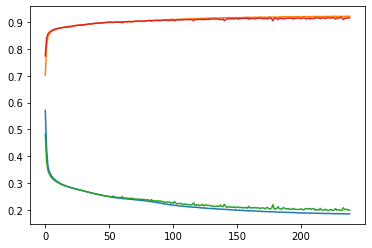

In [ ]:
plt.plot(loss_df)
plt.show()

In [ ]:
y_train_pred=ann.predict(X_train)

1599/1599 [==============================] - 2s 1ms/step


In [ ]:
y_test_pred=ann.predict(X_test)

686/686 [==============================] - 1s 1ms/step


In [ ]:
y_train_pred=np.where(y_train_pred>0.5,1,0)
y_test_pred=np.where(y_test_pred>0.5,1,0)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train_pred,y_train))
print(classification_report(y_test_pred,y_test))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92     24450
           1       0.94      0.90      0.92     26701

    accuracy                           0.92     51151
   macro avg       0.92      0.92      0.92     51151
weighted avg       0.92      0.92      0.92     51151

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     10519
           1       0.94      0.90      0.92     11404

    accuracy                           0.92     21923
   macro avg       0.92      0.92      0.92     21923
weighted avg       0.92      0.92      0.92     21923

